In [1]:
#Importing main packages to start exploratory analysis
import pandas as pd
import numpy as np
from pandas import read_csv
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

warnings.filterwarnings("ignore")


# Loading Train Datasets
Surveydata_train_original = read_csv('Surveydata_train.csv')
Traveldata_train_original = read_csv('Traveldata_train.csv')

# Loading Test Datasets
Surveydata_test_original = read_csv('Surveydata_test.csv')
Traveldata_test_original = read_csv('Traveldata_test.csv')

pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns', None)

In [2]:
Surveydata_train=Surveydata_train_original.copy()
Traveldata_train=Traveldata_train_original.copy()
Surveydata_test=Surveydata_test_original.copy()
Traveldata_test=Traveldata_test_original.copy()


In [3]:
np.random.seed(1)
Surveydata_train.sample(n=200)

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
45654,98845655,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Acceptable,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good
5978,98805979,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Excellent,Excellent,Good,Good,Good,Good,Excellent,Good,Acceptable
18758,98818759,1,Needs Improvement,Ordinary,Needs Improvement,Needs Improvement,Needs Improvement,Excellent,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Excellent,Needs Improvement,Excellent,Good
88394,98888395,1,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Acceptable,Excellent,Acceptable,Good,Excellent,Poor,Excellent
1833,98801834,0,Poor,Green Car,Good,Poor,Convenient,Poor,Excellent,Excellent,Excellent,Good,Good,Excellent,Excellent,Good,Excellent
93781,98893782,0,Needs Improvement,Ordinary,Good,Good,Convenient,Acceptable,Acceptable,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Acceptable
31031,98831032,1,Excellent,Ordinary,Good,NaN,Convenient,Needs Improvement,Excellent,Needs Improvement,Needs Improvement,Excellent,Acceptable,Excellent,Excellent,Excellent,Needs Improvement
71984,98871985,0,Poor,Ordinary,Poor,Poor,Inconvenient,Poor,Poor,Poor,Poor,Good,Good,Good,Good,Good,Poor
87195,98887196,1,Needs Improvement,Green Car,Good,Good,Convenient,Poor,Needs Improvement,Good,Poor,Poor,Needs Improvement,Poor,Poor,Poor,Good
31252,98831253,0,Acceptable,Green Car,Good,Needs Improvement,Manageable,Excellent,Needs Improvement,Excellent,Excellent,Acceptable,Good,Acceptable,Acceptable,Good,Excellent


In [4]:
np.random.seed(1)
Traveldata_train.sample(n=200)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
45654,98845655,Female,Loyal Customer,41.0,Business Travel,Business,1167,2.0,0.0
5978,98805979,Male,Loyal Customer,50.0,Business Travel,Business,1791,0.0,0.0
18758,98818759,Male,Loyal Customer,46.0,Business Travel,Business,3747,94.0,94.0
88394,98888395,Female,Loyal Customer,45.0,Business Travel,Eco,2288,133.0,120.0
1833,98801834,Male,Loyal Customer,26.0,Personal Travel,Eco,2928,111.0,158.0
93781,98893782,Female,Loyal Customer,61.0,Business Travel,Eco,749,0.0,0.0
31031,98831032,Female,Loyal Customer,19.0,NaN,Eco,2720,2.0,0.0
71984,98871985,Male,NaN,38.0,Business Travel,Business,3065,5.0,15.0
87195,98887196,Female,Loyal Customer,56.0,Personal Travel,Eco,475,0.0,0.0
31252,98831253,Female,Disloyal Customer,55.0,Business Travel,Eco,1562,0.0,0.0


In [5]:
data_train = Surveydata_train.merge(Traveldata_train, how='inner', on ='ID')

In [6]:
print(Surveydata_train.shape,Traveldata_train.shape, data_train.shape)

(94379, 17) (94379, 9) (94379, 25)


In [7]:
np.random.seed(1)
data_train.sample(n=200)

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
45654,98845655,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Acceptable,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good,Female,Loyal Customer,41.0,Business Travel,Business,1167,2.0,0.0
5978,98805979,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Excellent,Excellent,Good,Good,Good,Good,Excellent,Good,Acceptable,Male,Loyal Customer,50.0,Business Travel,Business,1791,0.0,0.0
18758,98818759,1,Needs Improvement,Ordinary,Needs Improvement,Needs Improvement,Needs Improvement,Excellent,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Excellent,Needs Improvement,Excellent,Good,Male,Loyal Customer,46.0,Business Travel,Business,3747,94.0,94.0
88394,98888395,1,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Acceptable,Excellent,Acceptable,Good,Excellent,Poor,Excellent,Female,Loyal Customer,45.0,Business Travel,Eco,2288,133.0,120.0
1833,98801834,0,Poor,Green Car,Good,Poor,Convenient,Poor,Excellent,Excellent,Excellent,Good,Good,Excellent,Excellent,Good,Excellent,Male,Loyal Customer,26.0,Personal Travel,Eco,2928,111.0,158.0
93781,98893782,0,Needs Improvement,Ordinary,Good,Good,Convenient,Acceptable,Acceptable,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Acceptable,Female,Loyal Customer,61.0,Business Travel,Eco,749,0.0,0.0
31031,98831032,1,Excellent,Ordinary,Good,NaN,Convenient,Needs Improvement,Excellent,Needs Improvement,Needs Improvement,Excellent,Acceptable,Excellent,Excellent,Excellent,Needs Improvement,Female,Loyal Customer,19.0,NaN,Eco,2720,2.0,0.0
71984,98871985,0,Poor,Ordinary,Poor,Poor,Inconvenient,Poor,Poor,Poor,Poor,Good,Good,Good,Good,Good,Poor,Male,NaN,38.0,Business Travel,Business,3065,5.0,15.0
87195,98887196,1,Needs Improvement,Green Car,Good,Good,Convenient,Poor,Needs Improvement,Good,Poor,Poor,Needs Improvement,Poor,Poor,Poor,Good,Female,Loyal Customer,56.0,Personal Travel,Eco,475,0.0,0.0
31252,98831253,0,Acceptable,Green Car,Good,Needs Improvement,Manageable,Excellent,Needs Improvement,Excellent,Excellent,Acceptable,Good,Acceptable,Acceptable,Good,Excellent,Female,Disloyal Customer,55.0,Business Travel,Eco,1562,0.0,0.0


In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_Time_Convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_Location        94349 non-null  object 
 7   Onboard_Wifi_Service     94349 non-null  object 
 8   Onboard_Entertainment    94361 non-null  object 
 9   Online_Support           94288 non-null  object 
 10  Ease_of_Online_Booking   94306 non-null  object 
 11  Onboard_Service          86778 non-null  object 
 12  Legroom                  94289 non-null  object 
 13  Baggage_Handling         94237 non-null  object 
 14  CheckIn_Service       

### Checking for missing values

In [9]:
data_train.isnull().sum().sort_values(ascending=False)

Type_Travel                9226
Customer_Type              8951
Arrival_Time_Convenient    8930
Catering                   8741
Onboard_Service            7601
Arrival_Delay_in_Mins       357
Baggage_Handling            142
Online_Support               91
Legroom                      90
CheckIn_Service              77
Gender                       77
Ease_of_Online_Booking       73
Seat_Comfort                 61
Departure_Delay_in_Mins      57
Age                          33
Onboard_Wifi_Service         30
Platform_Location            30
Onboard_Entertainment        18
Cleanliness                   6
Online_Boarding               6
Overall_Experience            0
Seat_Class                    0
Travel_Class                  0
Travel_Distance               0
ID                            0
dtype: int64

In [10]:
data_train.isnull().sum().sort_values(ascending=False).index

Index(['Type_Travel', 'Customer_Type', 'Arrival_Time_Convenient', 'Catering',
       'Onboard_Service', 'Arrival_Delay_in_Mins', 'Baggage_Handling',
       'Online_Support', 'Legroom', 'CheckIn_Service', 'Gender',
       'Ease_of_Online_Booking', 'Seat_Comfort', 'Departure_Delay_in_Mins',
       'Age', 'Onboard_Wifi_Service', 'Platform_Location',
       'Onboard_Entertainment', 'Cleanliness', 'Online_Boarding',
       'Overall_Experience', 'Seat_Class', 'Travel_Class', 'Travel_Distance',
       'ID'],
      dtype='object')

### Checking for duplicate values

In [11]:
Surveydata_train.duplicated().sum()

0

### Numerical Feature's Univariate Analysis

In [12]:
Surveydata_num = ["Age", "Travel_Distance", "Departure_Delay_in_Mins", "Arrival_Delay_in_Mins"]

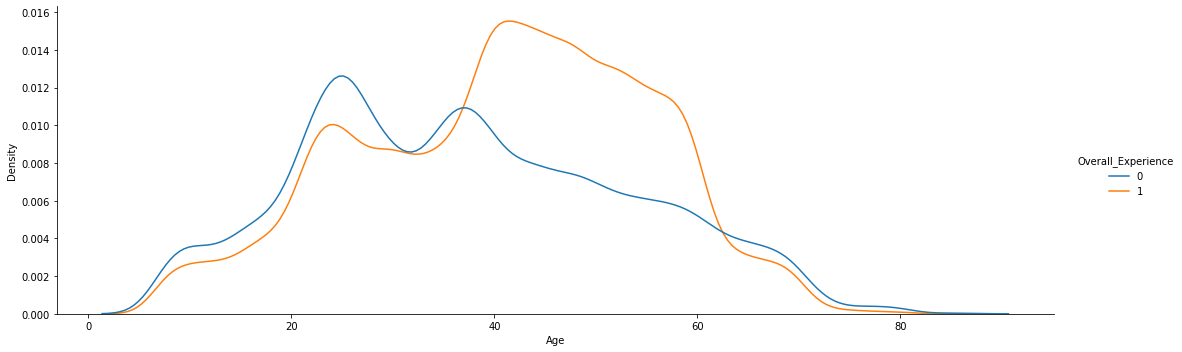

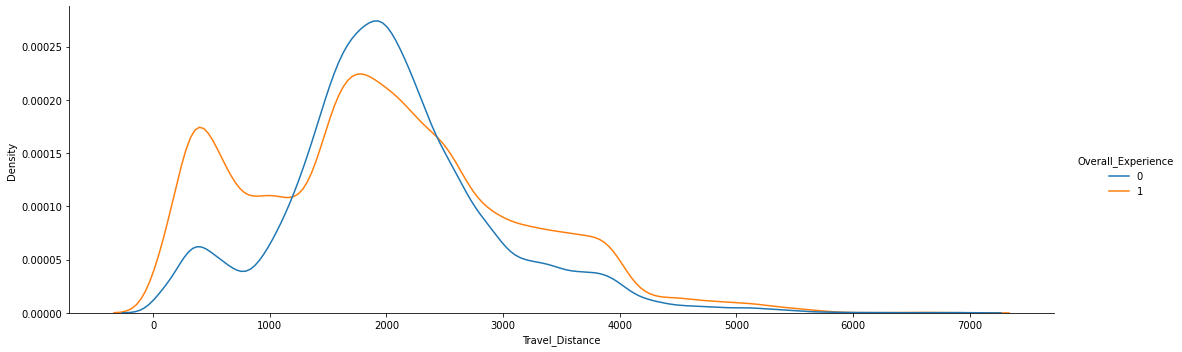

In [13]:
for cols in Surveydata_num[:2]:
    sns.displot(data_train, x=cols, hue="Overall_Experience", kind='kde',height=5, aspect=3)
    

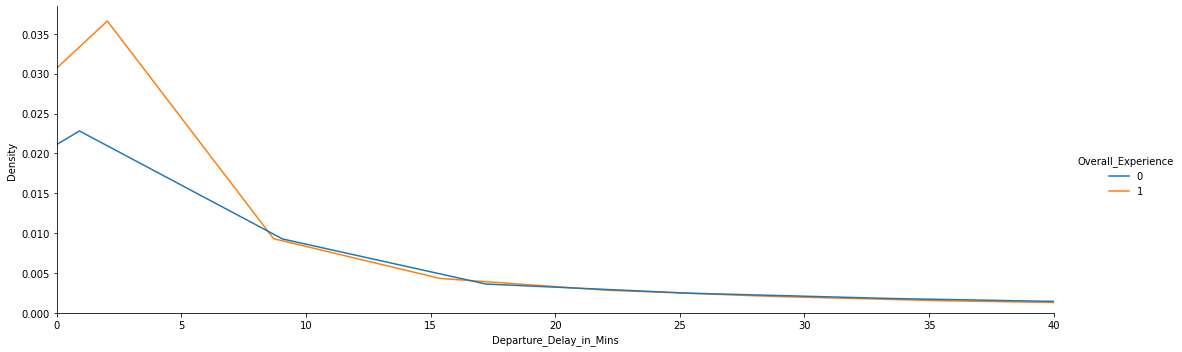

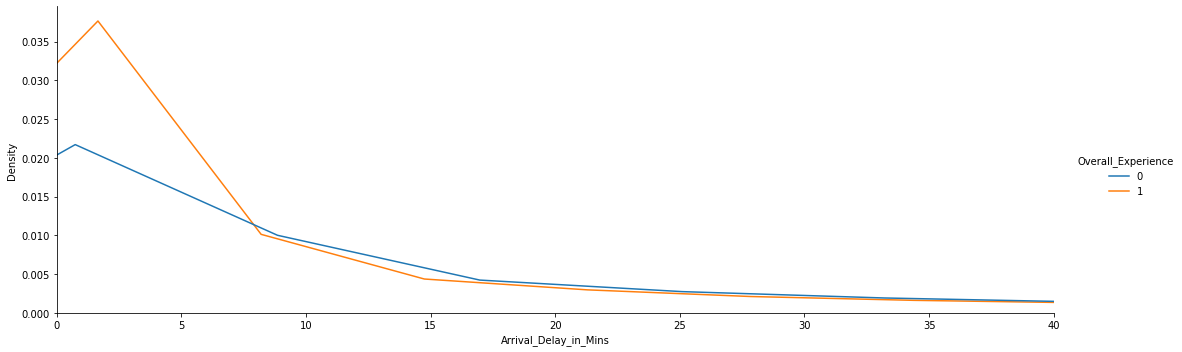

In [14]:
for cols in Surveydata_num[2:]:
    sns.displot(data_train, x=cols, hue="Overall_Experience", kind='kde',height=5, aspect=3)
    plt.xlim(0, 40)

### Treating Missing Numerical Features

In [15]:
# Age
data_train['Age'] = data_train['Age'].fillna(data_train['Age'].mode()[0])

# Departure_Delay_in_Mins
data_train['Departure_Delay_in_Mins'] = data_train['Departure_Delay_in_Mins'].fillna(data_train['Departure_Delay_in_Mins'].mode()[0])

# Arrival_Delay_in_Mins
data_train['Arrival_Delay_in_Mins'] = data_train['Arrival_Delay_in_Mins'].fillna(data_train['Arrival_Delay_in_Mins'].mode()[0])


In [16]:
data_train['Age'] = data_train['Age'].apply(lambda x: 1 if x>38.0 and x<62.0 else 0)
data_train['Departure_Delay_in_Mins'] = data_train['Departure_Delay_in_Mins'].apply(lambda x: 1 if x<9 else 0)
data_train['Arrival_Delay_in_Mins'] = data_train['Arrival_Delay_in_Mins'].apply(lambda x: 1 if x<9 else 0)

Surveydata_num = ["Travel_Distance"]

### Normalizing Numerical Features

In [17]:
scaler = StandardScaler()
scaler.fit(data_train[Surveydata_num])
data_train[Surveydata_num]=scaler.transform(data_train[Surveydata_num])

In [18]:
data_train.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor,Female,Loyal Customer,1,NaN,Business,-1.660469,1,1
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good,Male,Loyal Customer,1,Personal Travel,Eco,0.215099,0,1
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent,Female,Loyal Customer,1,Business Travel,Business,-0.892926,0,0
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable,Female,Loyal Customer,1,Business Travel,Business,-1.166284,0,0
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good,Female,Loyal Customer,1,Business Travel,Business,0.002054,1,1


### Categorical Feature's Univariate Analysis

In [19]:
Surveydata_cat = ['Type_Travel', 'Customer_Type', 'Arrival_Time_Convenient', 'Catering',
                   'Onboard_Service', 'Baggage_Handling',
                   'Online_Support', 'Legroom', 'CheckIn_Service', 'Gender',
                   'Ease_of_Online_Booking', 'Seat_Comfort',
                   'Onboard_Wifi_Service', 'Platform_Location',
                   'Onboard_Entertainment', 'Cleanliness', 'Online_Boarding',
                   'Seat_Class', 'Travel_Class']

In [20]:
for cols in Surveydata_cat:
    data_train[cols]=data_train[cols].astype(str).replace('nan','ismissing').astype('category')

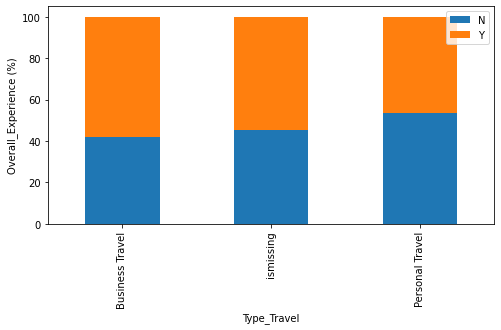

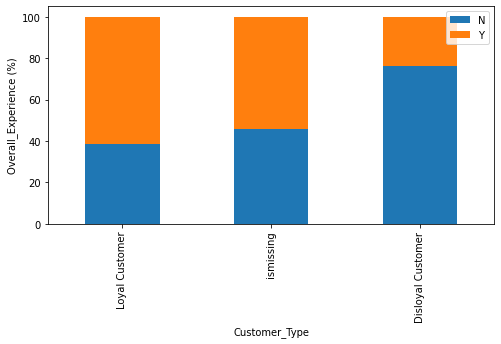

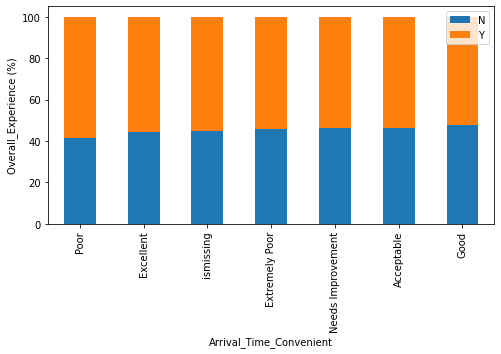

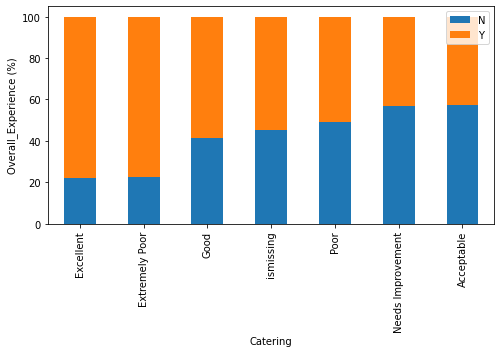

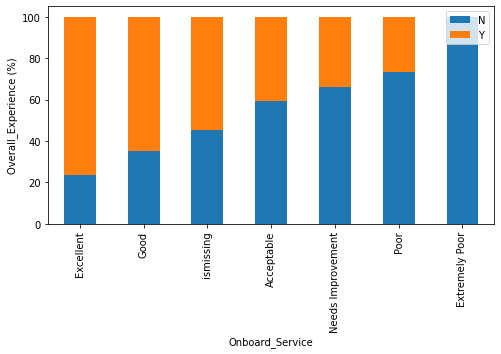

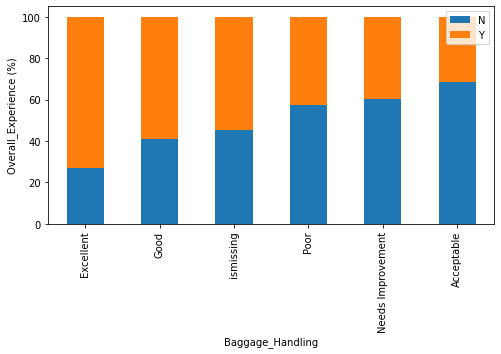

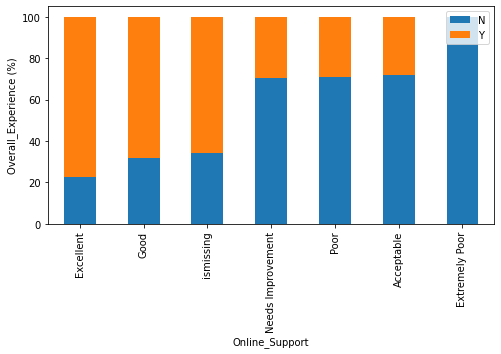

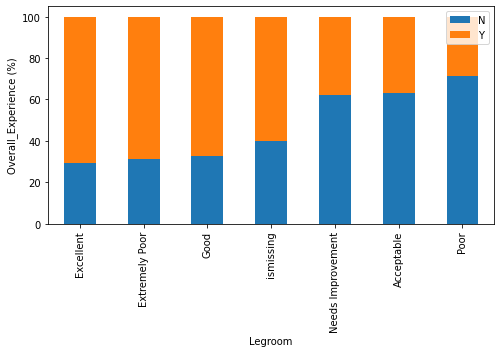

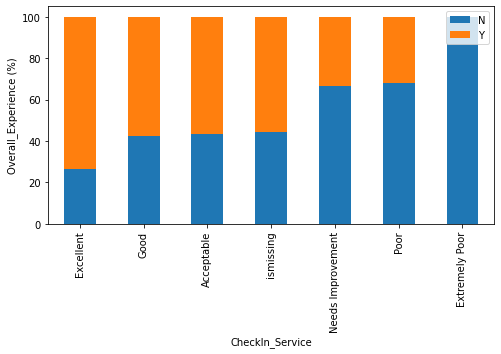

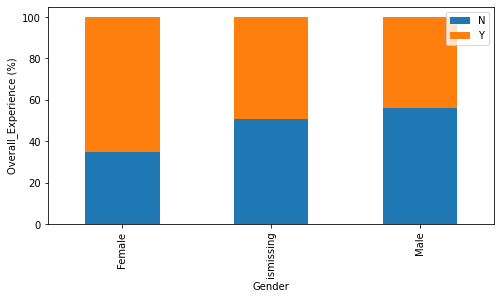

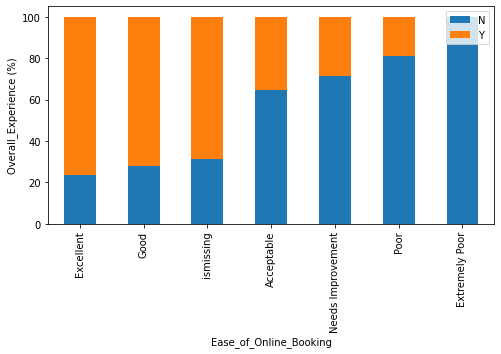

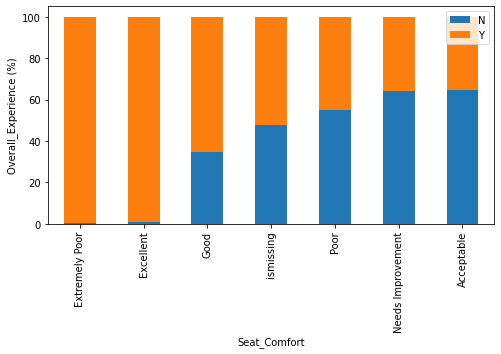

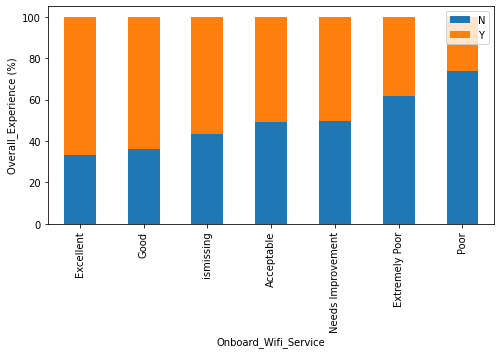

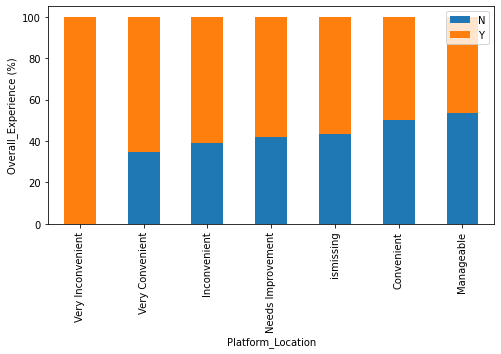

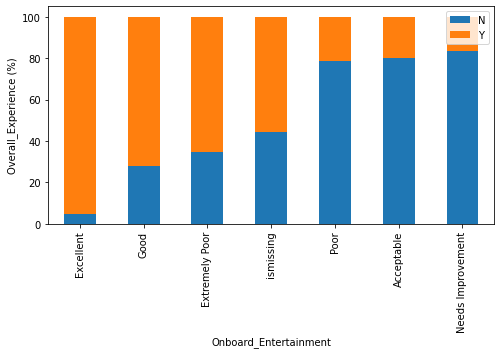

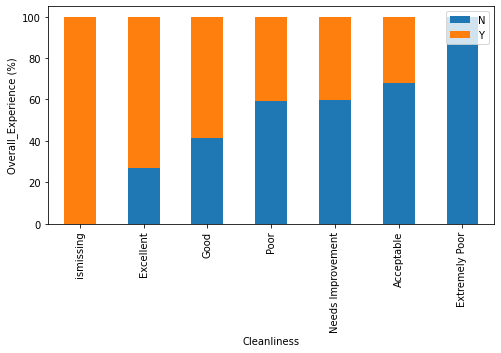

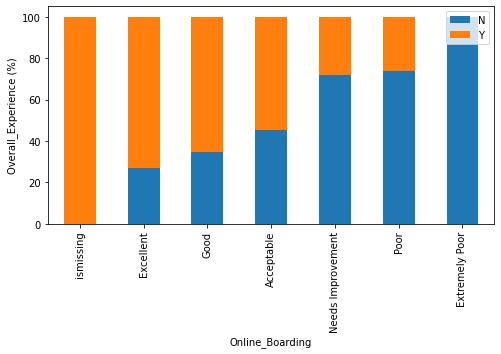

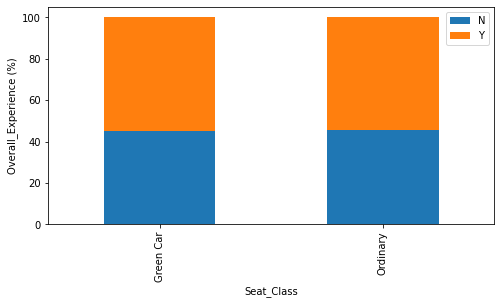

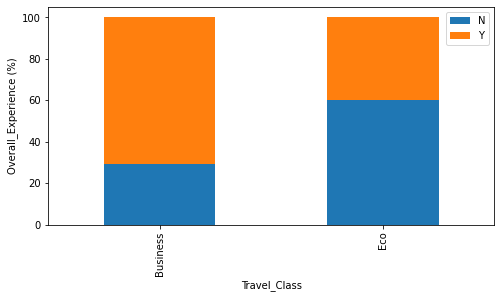

In [21]:
for i in Surveydata_cat:
    data_train_grp = pd.crosstab(data_train[i], data_train['Overall_Experience'], normalize='index', dropna=False)
    data_train_grp.columns = ['N', 'Y']
    (data_train_grp.sort_values('Y',ascending=False)*100).plot(kind='bar', figsize=(8,4), stacked=True)
    plt.ylabel('Overall_Experience (%)')

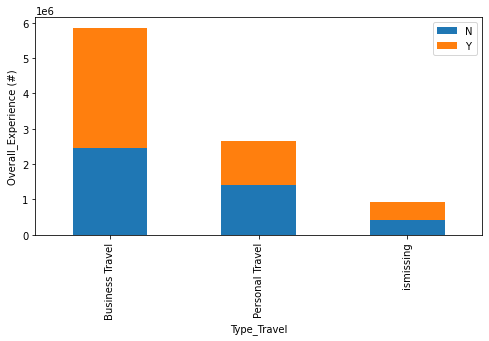

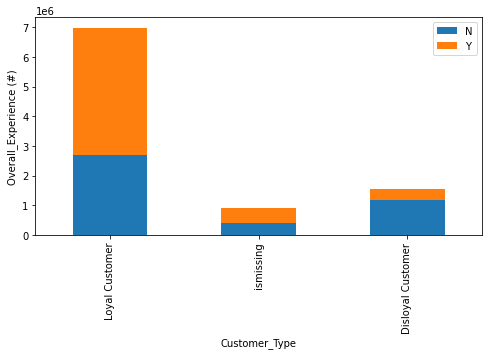

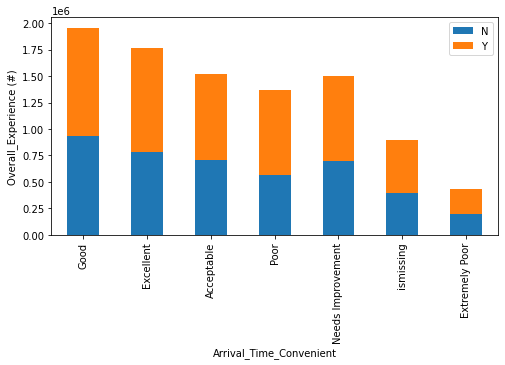

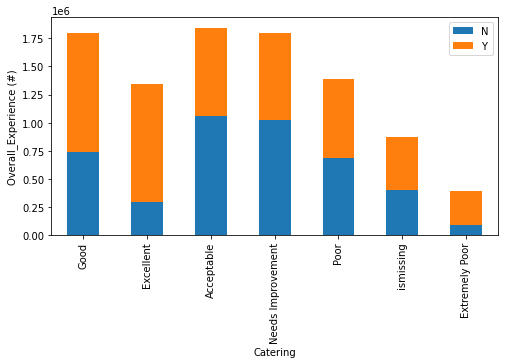

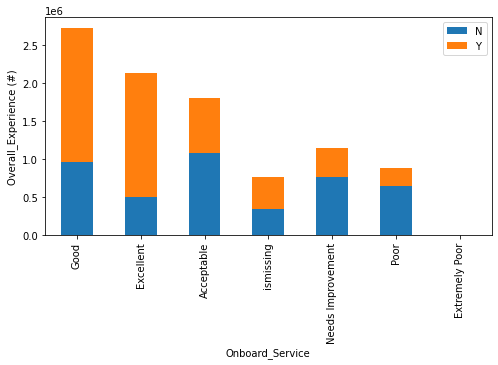

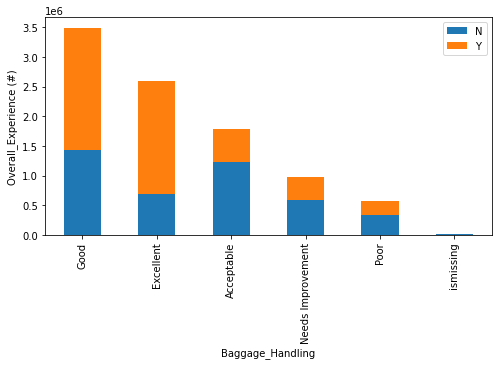

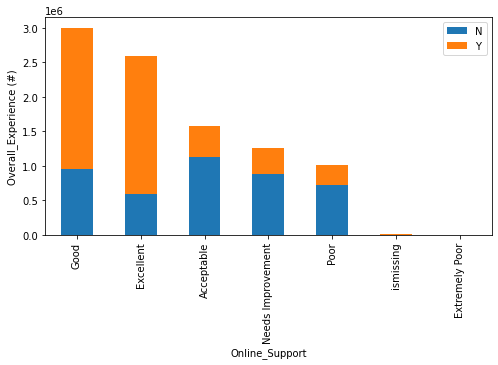

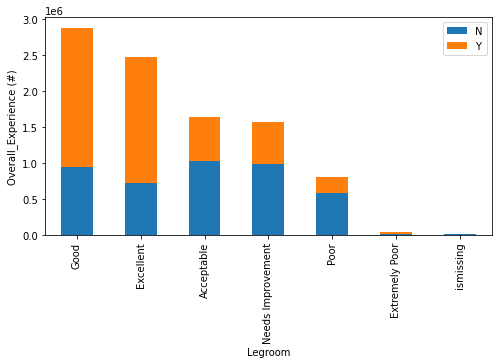

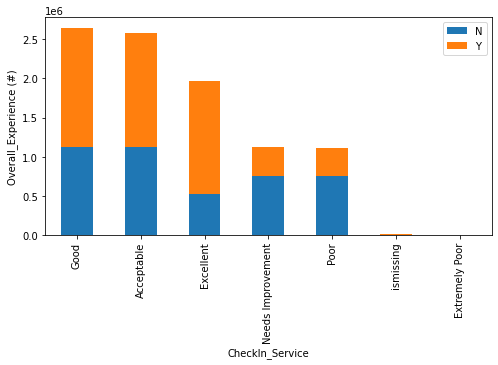

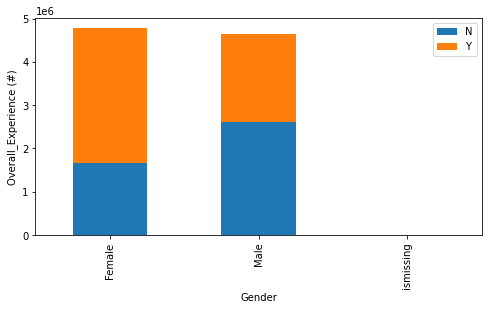

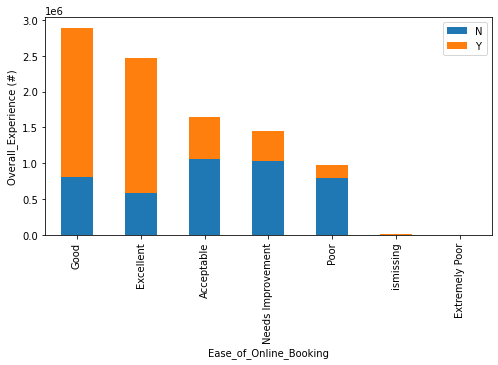

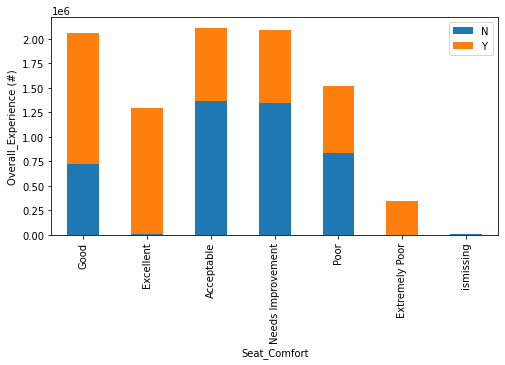

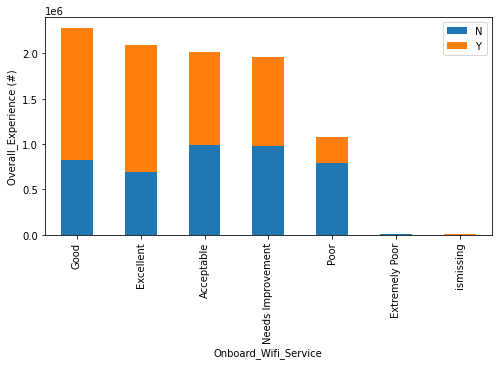

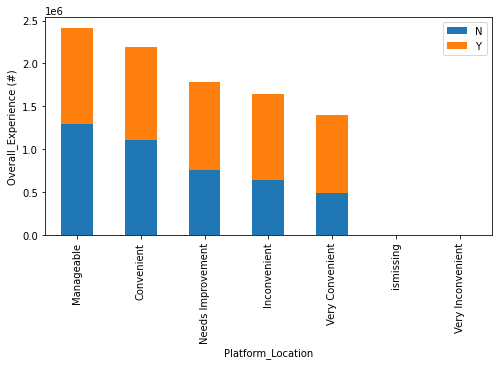

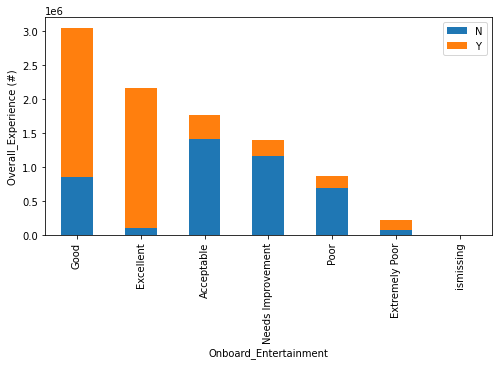

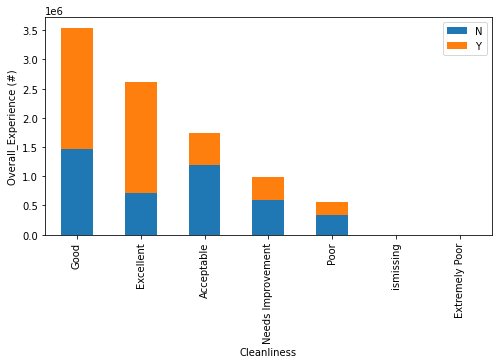

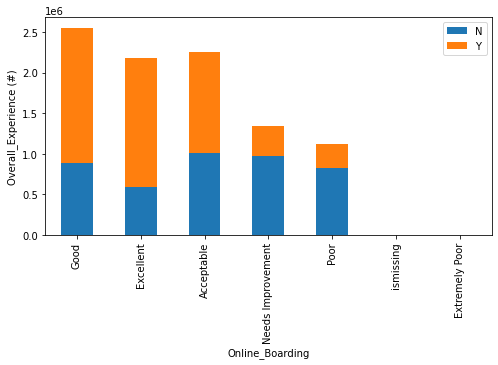

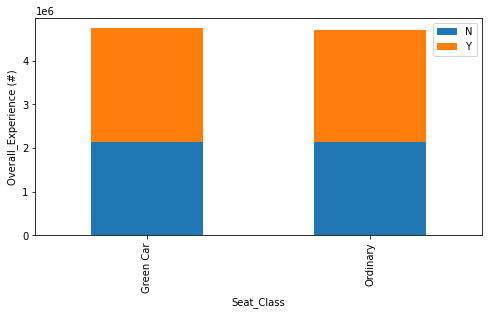

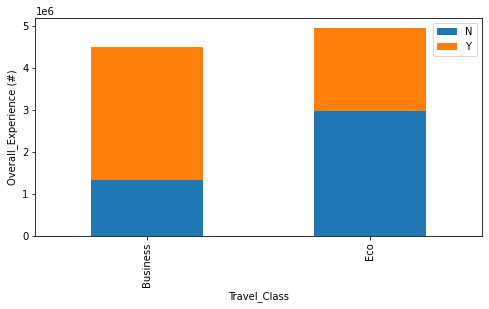

In [22]:
for i in Surveydata_cat:
    data_train_grp = pd.crosstab(data_train[i], data_train['Overall_Experience'], dropna=False)
    data_train_grp.columns = ['N', 'Y']
    (data_train_grp.sort_values('Y',ascending=False)*100).plot(kind='bar', figsize=(8,4), stacked=True)
    plt.ylabel('Overall_Experience (#)')

In [23]:
for i in Surveydata_cat:
    data_train_grp = pd.crosstab(data_train[i], data_train['Overall_Experience'], normalize='index', dropna=False)
    data_train_grp.columns = ['N', 'Y']
    print(data_train_grp.sort_values('Y',ascending=False)*100)
    print("\n\n")


                         N          Y
Type_Travel                          
Business Travel  41.696095  58.303905
ismissing        45.371775  54.628225
Personal Travel  53.357703  46.642297



                           N          Y
Customer_Type                          
Loyal Customer     38.374175  61.625825
ismissing          46.061893  53.938107
Disloyal Customer  76.058955  23.941045



                                 N          Y
Arrival_Time_Convenient                      
Poor                     41.177330  58.822670
Excellent                44.480887  55.519113
ismissing                44.703247  55.296753
Extremely Poor           45.729455  54.270545
Needs Improvement        46.377585  53.622415
Acceptable               46.451868  53.548132
Good                     47.547767  52.452233



                           N          Y
Catering                               
Excellent          21.887774  78.112226
Extremely Poor     22.480818  77.519182
Good               41.18760

In [24]:
def set_new_category(data):
    cat=['Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
         'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service',
         'Cleanliness', 'Online_Boarding']
    
    NewCategory = {'Category': ['ismissing','Extremely Poor','Poor','Needs Improvement','Acceptable','Good','Excellent'],
                   'Grade': [0,0,1,2,3,4,5]
              }
    
    for feature in cat:
        replacement_map = {i1: i2 for i1, i2 in zip(list(NewCategory["Category"]), list(NewCategory["Grade"]))}
        data[feature] = data[feature].map(replacement_map)
    
    replacement_map = {i1: i2 for i1, i2 in zip(["ismissing","Very Inconvenient","Inconvenient","Needs Improvement", "Manageable", "Convenient", "Very Convenient"], 
                                            [0,0,1,2,3,4,5])}
    data["Platform_Location"] = data["Platform_Location"].map(replacement_map)
    

    replacement_map = {i1: i2 for i1, i2 in zip(["ismissing","Business Travel","Personal Travel"], 
                                                [1, 1, 0])}
    data["Type_Travel"] = data["Type_Travel"].map(replacement_map)

    replacement_map = {i1: i2 for i1, i2 in zip(["ismissing","Male","Female"], 
                                                [0, 0, 1])}
    data["Gender"] = data["Gender"].map(replacement_map)

    replacement_map = {i1: i2 for i1, i2 in zip(["ismissing","Business","Eco"], 
                                                [1, 1, 0])}
    data["Travel_Class"] = data["Travel_Class"].map(replacement_map)

    replacement_map = {i1: i2 for i1, i2 in zip(["ismissing","Disloyal Customer","Loyal Customer"], 
                                                [0, 0, 1])}
    data["Customer_Type"] = data["Customer_Type"].map(replacement_map)
    
    data["Seat_Class"]=0
    
    return data

In [25]:
data_train_ = set_new_category(data_train)

In [26]:
data_train_["Travel_Class"] = data_train_["Travel_Class"].astype(int)

In [27]:
data_train_

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,2,0,5,5,5,4,2,3,2,2,3,2,4,2,1,1,1,1,1,1,-1.660469,1,1
1,98800002,0,1,0,5,1,2,4,1,4,4,5,2,1,2,4,4,0,1,1,0,0,0.215099,0,1
2,98800003,1,2,0,2,2,2,2,4,5,5,5,5,5,4,5,5,1,1,1,1,1,-0.892926,0,0
3,98800004,0,3,0,2,0,2,3,2,3,3,3,3,3,4,3,3,1,1,1,1,1,-1.166284,0,0
4,98800005,1,3,0,3,3,3,2,4,5,4,4,4,4,4,4,4,1,1,1,1,1,0.002054,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,0,1,0,4,4,4,1,1,1,1,4,4,4,2,4,1,0,1,0,1,1,-0.604976,0,0
94375,98894376,1,4,0,4,4,4,2,5,5,3,3,3,3,4,3,4,0,1,1,1,1,-1.349171,1,0
94376,98894377,1,2,0,2,2,2,4,5,4,4,4,4,4,3,4,3,0,0,0,1,1,0.792945,1,1
94377,98894378,0,2,0,0,2,4,4,2,4,4,3,4,4,4,5,4,0,1,0,0,0,0.744304,1,1


In [28]:
#data_train[cols].astype(str)
for cols in data_train_.columns:
    if data_train_[cols].dtype not in ['int64','float64']:
        data_train_[cols]=data_train_[cols].astype('float64')

In [29]:
cat=['Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
         'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service',
         'Cleanliness', 'Online_Boarding', 'Platform_Location']

data_train_['Final_Grade']=0
for col in cat:
    data_train_['Final_Grade']=data_train_['Final_Grade']+data_train_[col]
data_train_['Final_Grade']

0        42.0
1        40.0
2        53.0
3        37.0
4        51.0
         ... 
94374    36.0
94375    51.0
94376    47.0
94377    46.0
94378    39.0
Name: Final_Grade, Length: 94379, dtype: float64

In [30]:
data_train_['Final_Grade'] = data_train_['Final_Grade'].apply(lambda x: 0 if x<35 
                                                            else (1 if x<40 
                                                                  else(2 if x<45 
                                                                      else (3 if x< 48
                                                                           else (4 if x<51 
                                                                                else (5 if x<55
                                                                                     else (6 if x<59
                                                                                          else 7))))))
                                                            )

In [31]:
data_train_

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Final_Grade
0,98800001,0,2,0,5,5,5,4,2,3,2,2,3,2.0,4,2,1,1,1,1,1,1,-1.660469,1,1,2
1,98800002,0,1,0,5,1,2,4,1,4,4,5,2,1.0,2,4,4,0,1,1,0,0,0.215099,0,1,2
2,98800003,1,2,0,2,2,2,2,4,5,5,5,5,5.0,4,5,5,1,1,1,1,1,-0.892926,0,0,5
3,98800004,0,3,0,2,0,2,3,2,3,3,3,3,3.0,4,3,3,1,1,1,1,1,-1.166284,0,0,1
4,98800005,1,3,0,3,3,3,2,4,5,4,4,4,4.0,4,4,4,1,1,1,1,1,0.002054,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,0,1,0,4,4,4,1,1,1,1,4,4,4.0,2,4,1,0,1,0,1,1,-0.604976,0,0,1
94375,98894376,1,4,0,4,4,4,2,5,5,3,3,3,3.0,4,3,4,0,1,1,1,1,-1.349171,1,0,5
94376,98894377,1,2,0,2,2,2,4,5,4,4,4,4,4.0,3,4,3,0,0,0,1,1,0.792945,1,1,3
94377,98894378,0,2,0,0,2,4,4,2,4,4,3,4,4.0,4,5,4,0,1,0,0,0,0.744304,1,1,3


### Transforming Test Dataset

In [32]:
data_test = Surveydata_test.merge(Traveldata_test, how='inner', on ='ID')

Numerical

In [33]:
# Age
data_test['Age'] = data_test['Age'].fillna(data_train['Age'].mode()[0])

# Departure_Delay_in_Mins
data_test['Departure_Delay_in_Mins'] = data_test['Departure_Delay_in_Mins'].fillna(data_train['Departure_Delay_in_Mins'].mode()[0])

# Arrival_Delay_in_Mins
data_test['Arrival_Delay_in_Mins'] = data_test['Arrival_Delay_in_Mins'].fillna(data_train['Arrival_Delay_in_Mins'].mode()[0])


In [34]:
data_test[["Age", "Travel_Distance", "Departure_Delay_in_Mins", "Arrival_Delay_in_Mins"]]=data_test[["Age", "Travel_Distance", "Departure_Delay_in_Mins", "Arrival_Delay_in_Mins"]].astype(int)

data_train['Age'] = data_train['Age'].apply(lambda x: 1 if x>38.0 and x<62.0 else 0)
data_train['Departure_Delay_in_Mins'] = data_train['Departure_Delay_in_Mins'].apply(lambda x: 1 if x<9 else 0)
data_train['Arrival_Delay_in_Mins'] = data_train['Arrival_Delay_in_Mins'].apply(lambda x: 1 if x<9 else 0)


In [35]:
data_test[Surveydata_num]=scaler.transform(data_test[Surveydata_num])
data_test.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor,Female,NaN,36,Business Travel,Business,-1.407540,0,0
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable,Female,Disloyal Customer,21,Business Travel,Business,-0.538825,9,28
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent,Male,Loyal Customer,60,Business Travel,Business,0.829911,0,0
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor,Female,Loyal Customer,29,Personal Travel,Eco,-0.609840,0,0
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent,Male,Disloyal Customer,18,Business Travel,Business,-0.358856,17,0


Categorical

In [36]:
for cols in Surveydata_cat[:-2]:
    data_test[cols]=data_test[cols].astype(str).replace('nan','ismissing').astype('category')

In [37]:
data_test_ = set_new_category(data_test)
data_test_.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,3,0,3,3,3,2,5,4,5,5,5,5,4,5,1,1,0,36,1,1,-1.407540,0,0
1,99900002,0,0,4,1,3,3,1,3,3,5,3,4,3,5,3,1,0,21,1,1,-0.538825,9,28
2,99900003,5,0,5,5,5,5,5,5,2,2,2,2,4,2,5,0,1,60,1,1,0.829911,0,0
3,99900004,3,0,5,3,5,1,3,5,1,3,2,5,5,5,1,1,1,29,0,0,-0.609840,0,0
4,99900005,5,0,0,5,2,5,5,5,5,0,3,5,5,5,5,0,0,18,1,1,-0.358856,17,0


In [38]:
#data_train[cols].astype(str)
for cols in data_test_.columns:
    if data_test_[cols].dtype not in ['int64','float64']:
        data_test_[cols]=data_test_[cols].astype('float64')

In [39]:
#data_test_.info()
data_test_.isnull().sum().sort_values(ascending=False)

ID                         0
Seat_Comfort               0
Departure_Delay_in_Mins    0
Travel_Distance            0
Travel_Class               0
Type_Travel                0
Age                        0
Customer_Type              0
Gender                     0
Online_Boarding            0
Cleanliness                0
CheckIn_Service            0
Baggage_Handling           0
Legroom                    0
Onboard_Service            0
Ease_of_Online_Booking     0
Online_Support             0
Onboard_Entertainment      0
Onboard_Wifi_Service       0
Platform_Location          0
Catering                   0
Arrival_Time_Convenient    0
Seat_Class                 0
Arrival_Delay_in_Mins      0
dtype: int64

In [40]:
cat=['Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
         'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service',
         'Cleanliness', 'Online_Boarding', 'Platform_Location']

data_test_['Final_Grade']=0
for col in cat:
    data_test_['Final_Grade']=data_train_['Final_Grade']+data_test_[col]
data_test_['Final_Grade']

0         5.0
1         5.0
2        10.0
3         6.0
4         7.0
         ... 
35597     5.0
35598     7.0
35599     8.0
35600     5.0
35601     3.0
Name: Final_Grade, Length: 35602, dtype: float64

In [41]:
data_test_['Final_Grade'] = data_test_['Final_Grade'].apply(lambda x: 0 if x<35 
                                                            else (1 if x<40 
                                                                  else(2 if x<45 
                                                                      else (3 if x< 48
                                                                           else (4 if x<51 
                                                                                else (5 if x<55
                                                                                     else (6 if x<59
                                                                                          else 7))))))
                                                            )

### Model

In [42]:
# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV

# To get diferent metric scores
from sklearn.metrics import accuracy_score


In [43]:
data_train_.drop('ID',axis='columns', inplace=True)
data_train_.head()

,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Final_Grade
0,0,2,0,5,5,5,4,2,3,2,2,3,2.0,4,2,1,1,1,0,1,1,-1.660469,1,1,2
1,0,1,0,5,1,2,4,1,4,4,5,2,1.0,2,4,4,0,1,0,0,0,0.215099,1,1,2
2,1,2,0,2,2,2,2,4,5,5,5,5,5.0,4,5,5,1,1,0,1,1,-0.892926,1,1,5
3,0,3,0,2,0,2,3,2,3,3,3,3,3.0,4,3,3,1,1,0,1,1,-1.166284,1,1,1
4,1,3,0,3,3,3,2,4,5,4,4,4,4.0,4,4,4,1,1,0,1,1,0.002054,1,1,5


In [44]:
# Load your dataset
X=data_train_.drop(['Overall_Experience', 'Seat_Class', 'Age', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'],axis='columns')
y=data_train_['Overall_Experience']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,stratify=y, random_state=1)

Gradient Boosting

In [ ]:
# Initialize the Algorithm Classifier
gbc = GradientBoostingClassifier(random_state=42)

# define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [150, 200, 250],
    'max_depth': [7, 9, 11],
    'learning_rate': [0.01, 0.1],
}

# perform grid search using cross-validation
grid_search = GridSearchCV(gbc, param_grid, cv=5, n_jobs=-1)

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)

print("Best score: ", -grid_search.best_score_)

In [ ]:
# Evaluate the best model on the test set
best_model_gbc = grid_search.best_estimator_
test_accuracy_gbc = best_model_gbc.score(X_test, y_test)
print("Test set accuracy: ", test_accuracy_gbc)

Testing GBC

In [45]:
# Load your dataset
X=data_train_.drop(['Overall_Experience', 'Seat_Class', 'Age', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'],axis='columns')
y=data_train_['Overall_Experience']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,stratify=y, random_state=1)

gbc=GradientBoostingClassifier(learning_rate= 0.1, max_depth= 9, n_estimators= 200, random_state=42)
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

thresholds = list(np.arange(0.5, 0.6, 0.01))
scores = []
for threshold in thresholds:
    y_pred_threshold = (gbc.predict_proba(X_test)[:, 1] >= threshold).astype(int)
    scores.append(accuracy_score(y_test, y_pred_threshold))

# Find the threshold with the highest Accuracy
best_threshold = thresholds[scores.index(max(scores))]
print("Best threshold: ", best_threshold)

y_pred_threshold = (gbc.predict_proba(X_test)[:, 1] >= best_threshold).astype(int)
print(accuracy_score(y_test, y_pred_threshold))

Best threshold:  0.53
0.9512608603517695


<AxesSubplot:xlabel='Importance', ylabel='Features'>

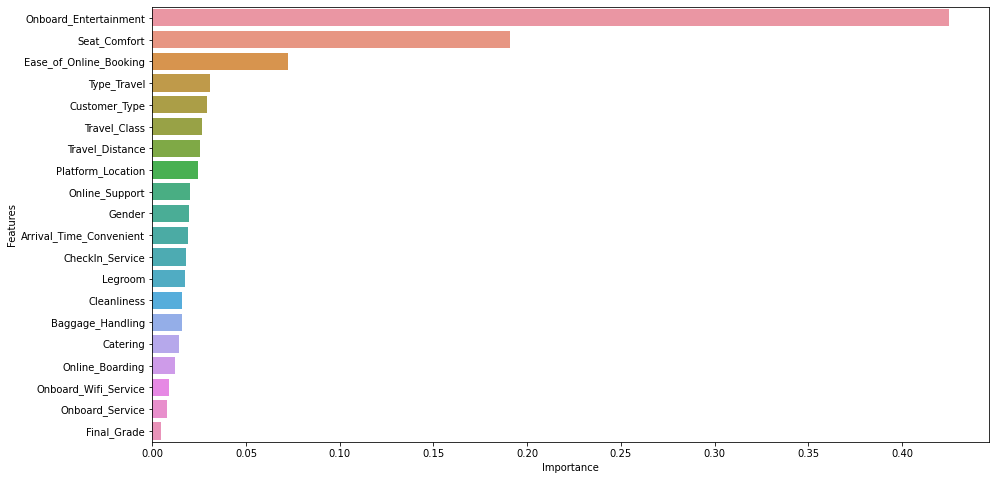

In [46]:
feature_importance = pd.DataFrame(data = {'Features': list(X.columns),
                                         'Importance': list(gbc.feature_importances_)}).sort_values('Importance',
                                                                                                    ascending=False)
plt.figure(figsize=(15,8))
sns.barplot(x = feature_importance['Importance'], y = feature_importance['Features'])

XGBClassifier

In [ ]:
# Initialize the Algorithm Classifier
xgb = XGBClassifier(random_state=42)

# define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [150, 200, 250],
    'max_depth': [5, 7, 9, 11],
    'learning_rate': [0.01, 0.1, 1],
}

# perform grid search using cross-validation
grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)

print("Best score: ", -grid_search.best_score_)

In [ ]:
# Evaluate the best model on the test set
best_model_xgb = grid_search.best_estimator_
test_accuracy_xgb = best_model_xgb.score(X_test, y_test)
print("Test set accuracy: ", test_accuracy_xgb)

In [ ]:
# Load your dataset
X=data_train_.drop(['Overall_Experience', 'Seat_Class', 'Age', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'],axis='columns')
y=data_train_['Overall_Experience']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,stratify=y, random_state=1)

xgb=XGBClassifier(learning_rate= 0.1, max_depth= 9, n_estimators= 200, random_state=42)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

thresholds = list(np.arange(0.5, 0.6, 0.01))
scores = []
for threshold in thresholds:
    y_pred_threshold = (xgb.predict_proba(X_test)[:, 1] >= threshold).astype(int)
    scores.append(accuracy_score(y_test, y_pred_threshold))

# Find the threshold with the highest Accuracy
best_threshold = thresholds[scores.index(max(scores))]
print("Best threshold: ", best_threshold)

print("\n\n")
y_pred_threshold = (xgb.predict_proba(X_test)[:, 1] >= best_threshold).astype(int)
print(accuracy_score(y_test, y_pred_threshold))

In [ ]:
0.5900000000000001
0.9486119940665395

### Submission

In [47]:
data_test_.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Final_Grade
0,99900001,3,0,3,3,3.0,2,5,4.0,5,5.0,5,5.0,4.0,5.0,1,1,0,36.0,1,1,-1.407540,0.0,0.0,0
1,99900002,0,0,4,1,3.0,3,1,3.0,3,5.0,3,4.0,3.0,5.0,3,1,0,21.0,1,1,-0.538825,9.0,28.0,0
2,99900003,5,0,5,5,5.0,5,5,5.0,2,2.0,2,2.0,4.0,2.0,5,0,1,60.0,1,1,0.829911,0.0,0.0,0
3,99900004,3,0,5,3,5.0,1,3,5.0,1,3.0,2,5.0,5.0,5.0,1,1,1,29.0,0,0,-0.609840,0.0,0.0,0
4,99900005,5,0,0,5,2.0,5,5,5.0,5,0.0,3,5.0,5.0,5.0,5,0,0,18.0,1,1,-0.358856,17.0,0.0,0


In [48]:
X_sub = data_test_.drop(['ID', 'Seat_Class', 'Age', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'],axis='columns')
X_sub.head()

,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Type_Travel,Travel_Class,Travel_Distance,Final_Grade
0,3,3,3,3.0,2,5,4.0,5,5.0,5,5.0,4.0,5.0,1,1,0,1,1,-1.407540,0
1,0,4,1,3.0,3,1,3.0,3,5.0,3,4.0,3.0,5.0,3,1,0,1,1,-0.538825,0
2,5,5,5,5.0,5,5,5.0,2,2.0,2,2.0,4.0,2.0,5,0,1,1,1,0.829911,0
3,3,5,3,5.0,1,3,5.0,1,3.0,2,5.0,5.0,5.0,1,1,1,0,0,-0.609840,0
4,5,0,5,2.0,5,5,5.0,5,0.0,3,5.0,5.0,5.0,5,0,0,1,1,-0.358856,0


In [49]:
y_sub = (gbc.predict_proba(X_sub)[:, 1] >= best_threshold).astype(int)

In [50]:
Rocky = pd.DataFrame(data= {'ID': data_test_['ID'], 'Overall_Experience': y_sub})
Rocky

,ID,Overall_Experience
0,99900001,1
1,99900002,1
2,99900003,1
3,99900004,0
4,99900005,1
...,...,...
35597,99935598,0
35598,99935599,1
35599,99935600,0
35600,99935601,1


In [51]:
Rocky.to_csv(r'C:\Users\felip\Documents\MIT-DataScience\Hackathons\Rocky.csv', index=False, header=True)